In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Урок 4

## Задание 1
Постройте график  
Назовите график  
Сделайте именование оси x и оси y  
Сделайте выводы  

### 1.1. Скачать данные по ссылке
https://gbcdn.mrgcdn.ru/uploads/asset/4266730/attachment/08ec55854637add5247d22396d0f7456.csv

In [52]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости
который будет содержать разницу в годах между годом реновацией дома и годом постройки дома  
Если реновации дома не было, то в новом признаке поставьте 0  

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

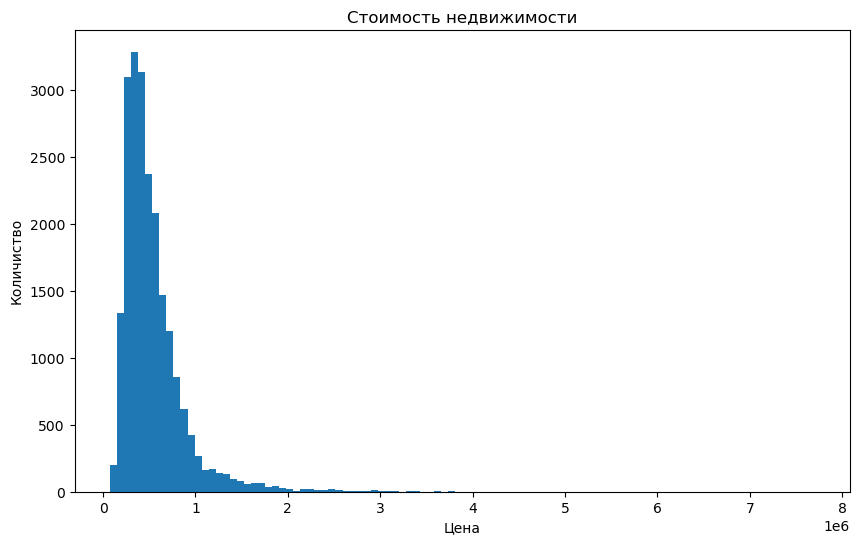

In [53]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=100)
plt.title('Стоимость недвижимости')
plt.xlabel('Цена')
plt.ylabel('Количиство')
df['price'].describe()

### 1.3 Изучите распределение квадратуры жилой

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

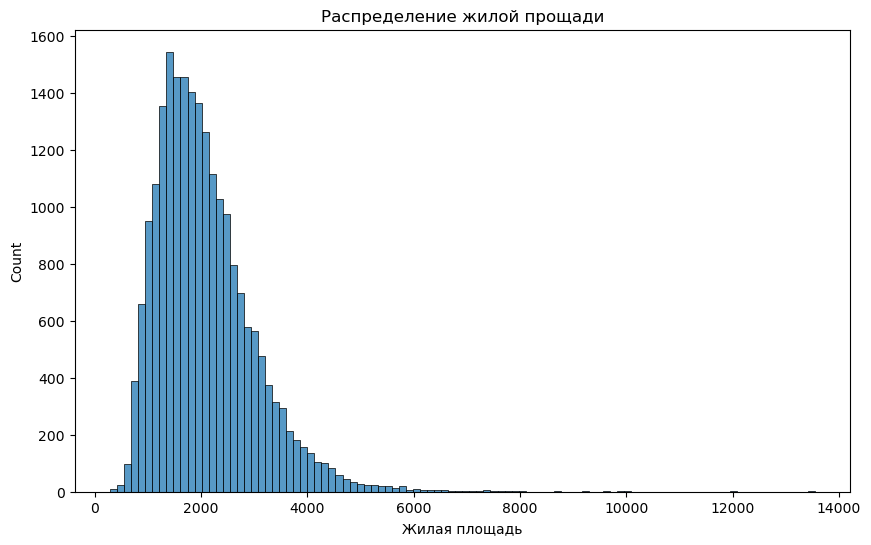

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sqft_living'], bins=100)
plt.title('Распределение жилой прощади')
plt.xlabel('Жилая площадь')
df['sqft_living'].describe()

Большинство домов имеют от 2000 до 3000 квадратных метров жилой площади

### 1.4 Изучите распределение года постройки

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

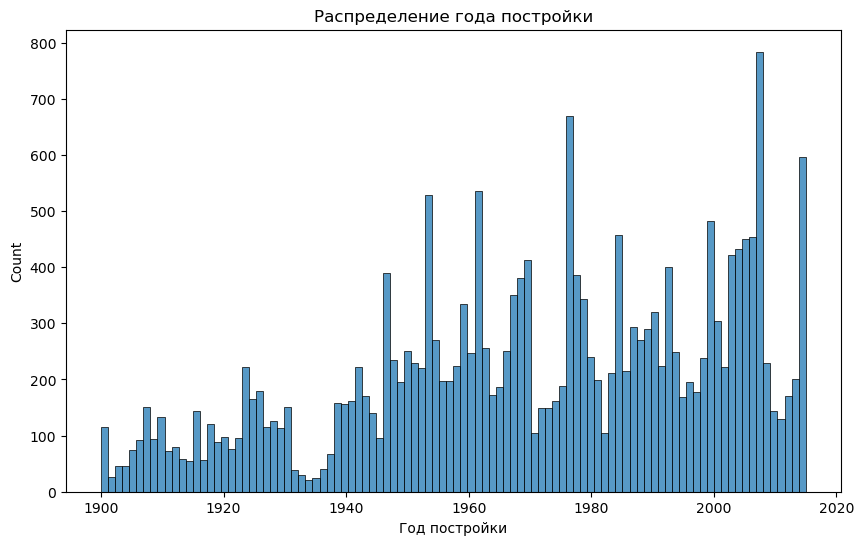

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(df['yr_built'], bins=100)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
df['yr_built'].describe()

Большинство домов построены в период 2010 по 2016, а меньше построек в период 1900 по 1910 и они же самые старые.

## Задание 2

### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

In [56]:
data = df['waterfront'].value_counts()
data.index = ['no', 'yes']
data.head()

no     21450
yes      163
Name: waterfront, dtype: int64

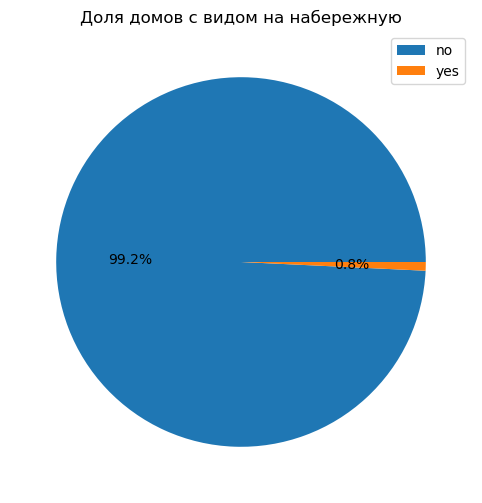

In [57]:
plt.figure(figsize=(10, 6))
plt.pie(data, autopct='%1.1f%%')
plt.title('Доля домов с видом на набережную')
plt.legend(data.index);

Только 0.8% домов имеют вид на набережную

### 2.2 Изучите распределение этажей домов

In [58]:
data = df['floors'].value_counts()
data

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

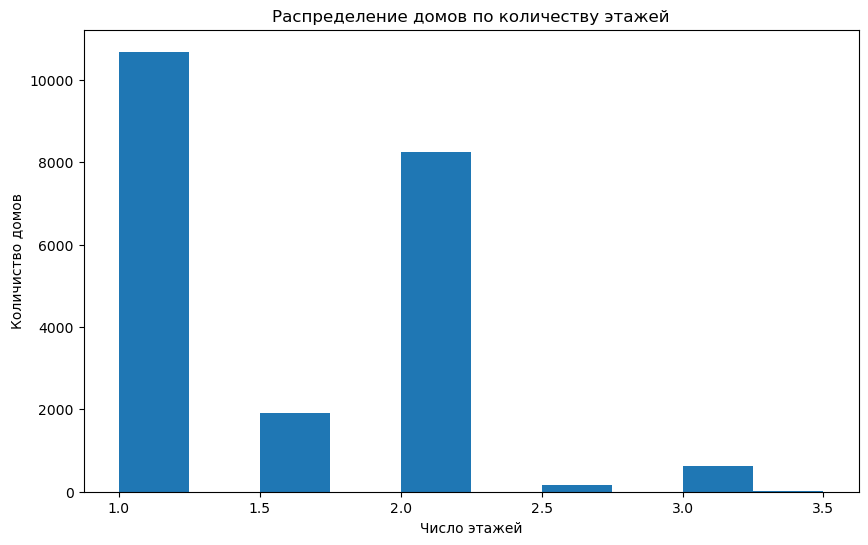

In [59]:
plt.figure(figsize=(10, 6))

plt.hist(df['floors'])

plt.title('Распределение домов по количеству этажей')
plt.xlabel('Число этажей')
plt.ylabel('Количиство домов');

Большинство домов с одним этажом

### 2.2 Изучите распределение состояния домов

In [60]:
data = df['grade'].value_counts()
data

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

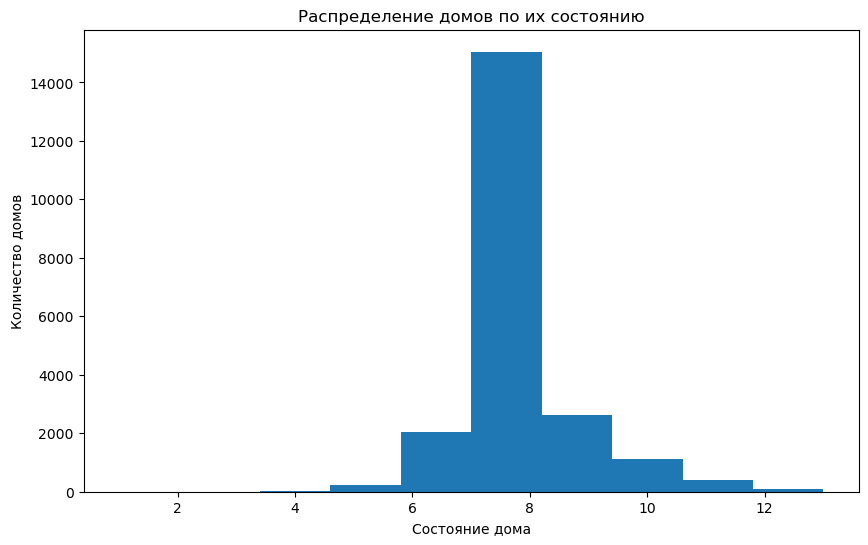

In [61]:
plt.figure(figsize=(10, 6))

plt.hist(df['grade'])

plt.title('Распределение домов по их состоянию')
plt.xlabel('Состояние дома')
plt.ylabel('Количество домов');

Большинство домов с оценкой качества 3, а меньше всего 1

## Задание 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости,  
с применением не менее 5 диаграмм из урока.  
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [62]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


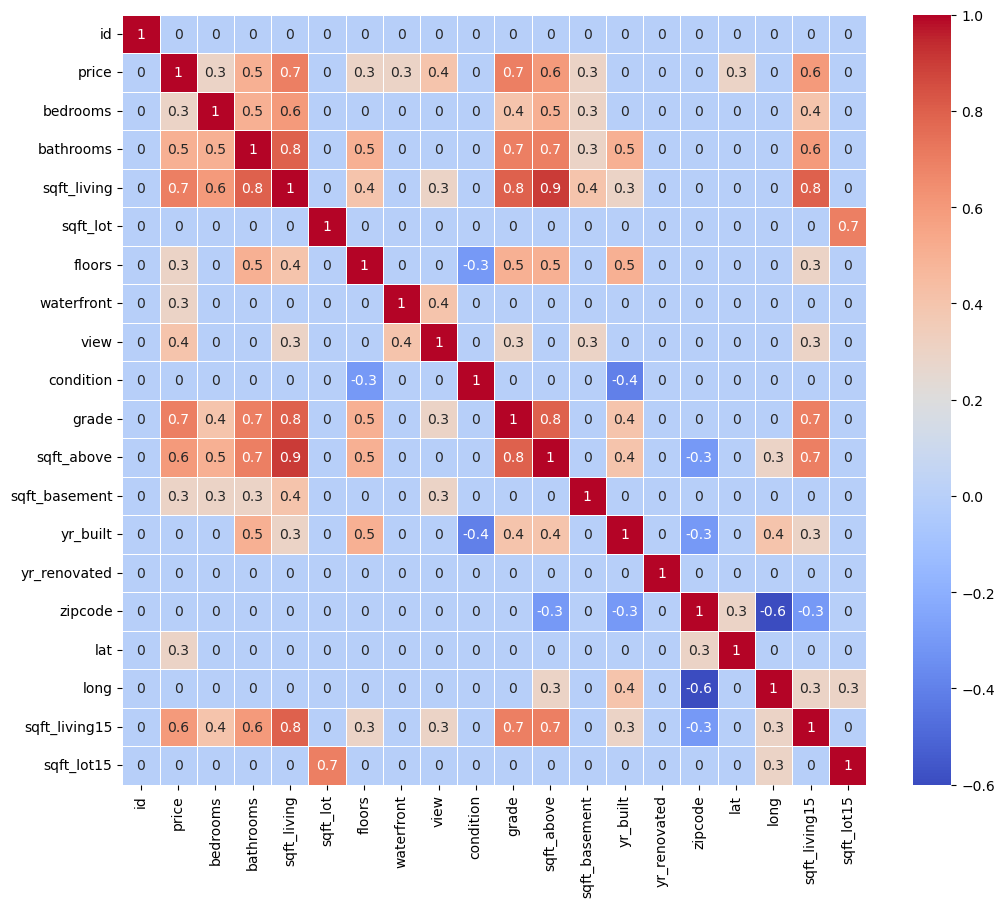

In [63]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

In [64]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<Figure size 800x600 with 0 Axes>

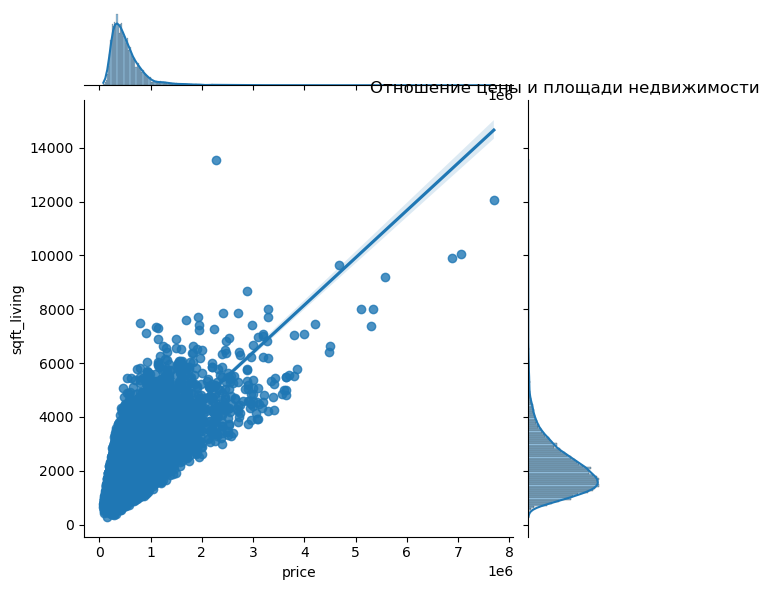

In [65]:
plt.figure(figsize=(8, 6))

sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg')
plt.title('Отношение цены и площади недвижимости');

На этом графике видно, что площадь недвижимости влияет но стоимость

<Figure size 800x600 with 0 Axes>

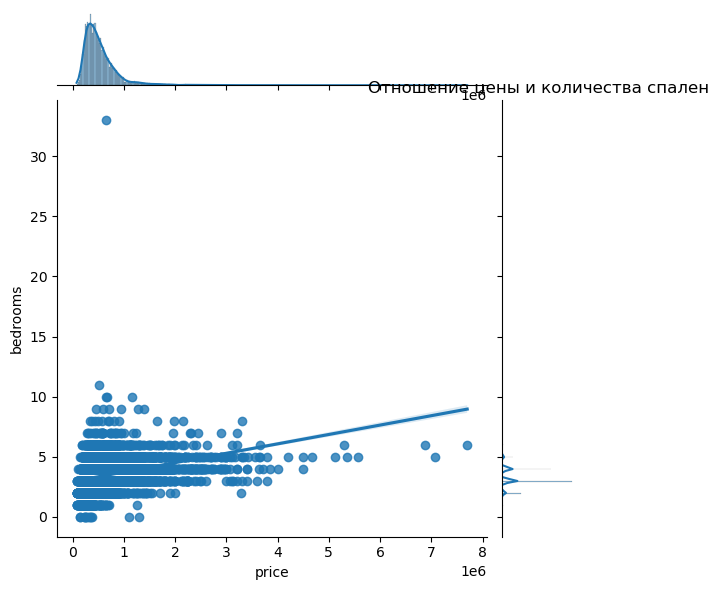

In [66]:
plt.figure(figsize=(8, 6))

sns.jointplot(x=df['price'], y=df['bedrooms'], kind='reg')
plt.title('Отношение цены и количества спален');

Из графика видно, что количество спален не сильно влияет на стоимость недвижимости

<Figure size 800x600 with 0 Axes>

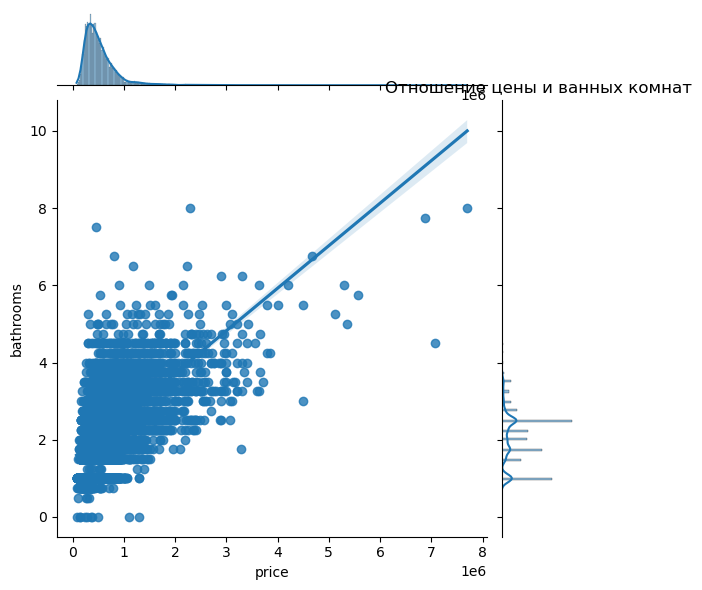

In [67]:
plt.figure(figsize=(8, 6))

sns.jointplot(x=df['price'], y=df['bathrooms'], kind='reg')
plt.title('Отношение цены и ванных комнат');

Из графика видно, что ванные комноты не влияют на стоимость недвижимости

<Figure size 800x600 with 0 Axes>

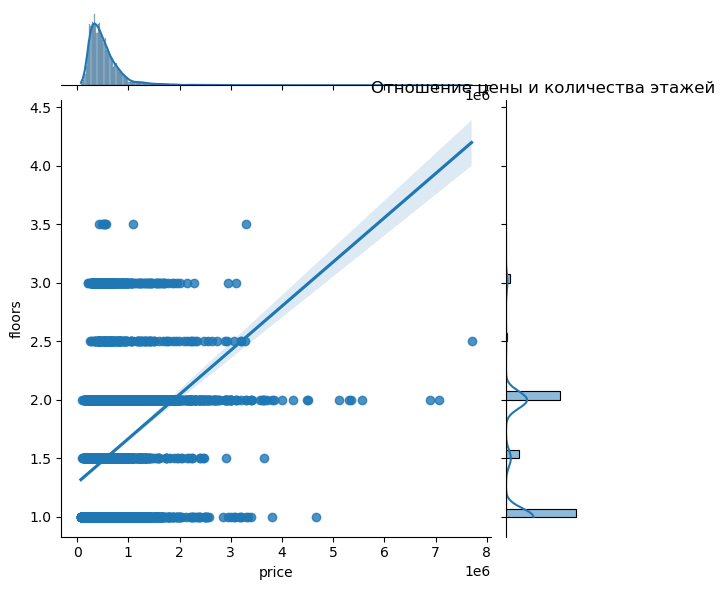

In [68]:
plt.figure(figsize=(8, 6))

sns.jointplot(x=df['price'], y=df['floors'], kind='reg')
plt.title('Отношение цены и количества этажей');

Из графика видно, что наиболее ценятся дома не выше 2.5 этажей. Выше дома теряют в цене

<Figure size 800x600 with 0 Axes>

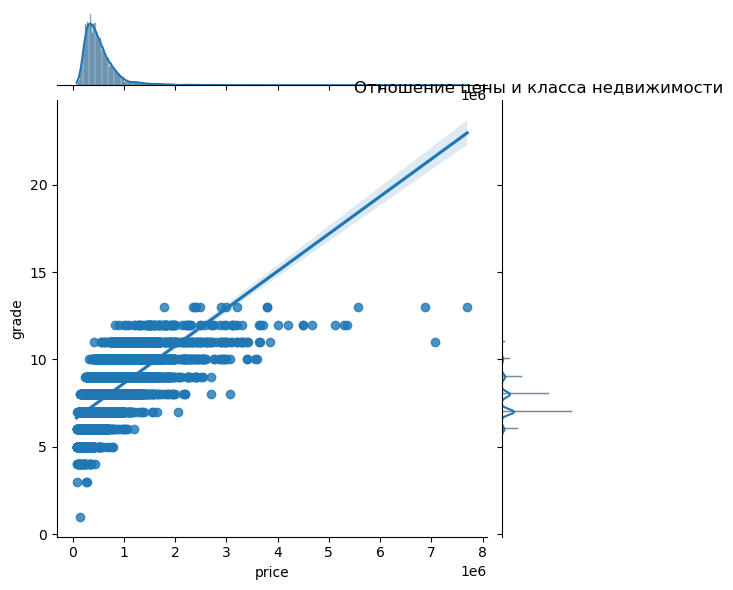

In [69]:
plt.figure(figsize=(8, 6))

sns.jointplot(x=df['price'], y=df['grade'], kind='reg')
plt.title('Отношение цены и класса недвижимости');

Из графика видно, что класс жилья существенно влияет на его стоимость

Вывод.  
Из графиков выше видно, что из 5 характеристик недвижимости не влияют на её стоимость  
количество спален и ванные комнаты, имеют значение площадь недвижимости и количество этажей,  
но не выше 2.5 и особое влияние на стоимость оказывает класс недвижимости.  